# Telecom Churn 

Using 21 variables related to customer behaviour (such as the monthly bill, internet usage etc.) to predict whether a particular customer will switch to another telecom provider or not (i.e. churn or not)

In [1]:
# importing the datasets

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',50)
pd.set_option('display.max_rows',50)

In [2]:
# importing the datasets

churn = pd.read_csv('churn_data.csv')
internet = pd.read_csv('internet_data.csv')
customer = pd.read_csv('customer_data.csv')

In [3]:
#Merging the two dataframes
df = pd.merge(churn,internet , how ='inner' , on = 'customerID' )
df = pd.merge(df , customer , how = 'inner' , on = 'customerID')

df.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,No phone service,DSL,No,Yes,No,No,No,No,Female,0,Yes,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,No,DSL,Yes,No,Yes,No,No,No,Male,0,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,No,DSL,Yes,Yes,No,No,No,No,Male,0,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,Male,0,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,No,Fiber optic,No,No,No,No,No,No,Female,0,No,No


Churn is our target variable

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   object 
 9   MultipleLines     7043 non-null   object 
 10  InternetService   7043 non-null   object 
 11  OnlineSecurity    7043 non-null   object 
 12  OnlineBackup      7043 non-null   object 
 13  DeviceProtection  7043 non-null   object 
 14  TechSupport       7043 non-null   object 
 15  StreamingTV       7043 non-null   object 
 16  StreamingMovies   7043 non-null   object 


In [5]:
df.describe()

,tenure,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147
std,24.559481,30.090047,0.368612
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
max,72.000000,118.750000,1.000000


## Data Preparation 

In [6]:
# Dropping customerID

df.drop('customerID',1 , inplace = True)
df.head()

,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents
0,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,No phone service,DSL,No,Yes,No,No,No,No,Female,0,Yes,No
1,34,Yes,One year,No,Mailed check,56.95,1889.5,No,No,DSL,Yes,No,Yes,No,No,No,Male,0,No,No
2,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,No,DSL,Yes,Yes,No,No,No,No,Male,0,No,No
3,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,Male,0,No,No
4,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,No,Fiber optic,No,No,No,No,No,No,Female,0,No,No


In [7]:
# Converting the datatype

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'] , errors = 'coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tenure            7043 non-null   int64  
 1   PhoneService      7043 non-null   object 
 2   Contract          7043 non-null   object 
 3   PaperlessBilling  7043 non-null   object 
 4   PaymentMethod     7043 non-null   object 
 5   MonthlyCharges    7043 non-null   float64
 6   TotalCharges      7032 non-null   float64
 7   Churn             7043 non-null   object 
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  gender            7043 non-null   object 


In [8]:
# Checking null values
df.isnull().sum()

tenure               0
PhoneService         0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
dtype: int64

In [9]:
df.dropna(how = 'any' , inplace = True)

df.isnull().sum()

tenure              0
PhoneService        0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
dtype: int64

In [10]:
#selecting categorical variables
cat = df.select_dtypes(include = 'object')
cat.head()

,PhoneService,Contract,PaperlessBilling,PaymentMethod,Churn,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,Partner,Dependents
0,No,Month-to-month,Yes,Electronic check,No,No phone service,DSL,No,Yes,No,No,No,No,Female,Yes,No
1,Yes,One year,No,Mailed check,No,No,DSL,Yes,No,Yes,No,No,No,Male,No,No
2,Yes,Month-to-month,Yes,Mailed check,Yes,No,DSL,Yes,Yes,No,No,No,No,Male,No,No
3,No,One year,No,Bank transfer (automatic),No,No phone service,DSL,Yes,No,Yes,Yes,No,No,Male,No,No
4,Yes,Month-to-month,Yes,Electronic check,Yes,No,Fiber optic,No,No,No,No,No,No,Female,No,No


In [11]:
for x in cat.columns:
    print(cat[x].value_counts())

Yes    6352
No      680
Name: PhoneService, dtype: int64
Month-to-month    3875
Two year          1685
One year          1472
Name: Contract, dtype: int64
Yes    4168
No     2864
Name: PaperlessBilling, dtype: int64
Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: PaymentMethod, dtype: int64
No     5163
Yes    1869
Name: Churn, dtype: int64
No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64
Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64
No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64
No                     3087
Yes                    2425
No internet service    1520
Name: OnlineBackup, dtype: int64
No                     3094
Yes                    2418
No internet service    1520
Name: DeviceProtection, dtype: int64
No

In [12]:
# Mapping all the Yes & No to 1 & 0

mapp = ['Dependents','Partner','Churn','PhoneService','PaperlessBilling']

df[mapp] = df[mapp].apply(lambda x:x.map({'Yes':1,'No':0}))
df[mapp].head()

,Dependents,Partner,Churn,PhoneService,PaperlessBilling
0,0,1,0,0,1
1,0,0,0,1,0
2,0,0,1,1,1
3,0,0,0,0,0
4,0,0,1,1,1


In [13]:
# Creating dummy variables 

dum_var = ['Contract', 'PaymentMethod' , 'gender' ]

dummy = pd.get_dummies(df[dum_var], drop_first= True )

df = pd.concat([df,dummy], axis = 1)
df.drop(dum_var,axis = 1 , inplace= True)

df.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male
0,1,0,1,29.85,29.85,0,No phone service,DSL,No,Yes,No,No,No,No,0,1,0,0,0,0,1,0,0
1,34,1,0,56.95,1889.50,0,No,DSL,Yes,No,Yes,No,No,No,0,0,0,1,0,0,0,1,1
2,2,1,1,53.85,108.15,1,No,DSL,Yes,Yes,No,No,No,No,0,0,0,0,0,0,0,1,1
3,45,0,0,42.30,1840.75,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,0,0,0,1,0,0,0,0,1
4,2,1,1,70.70,151.65,1,No,Fiber optic,No,No,No,No,No,No,0,0,0,0,0,0,1,0,0


In [14]:
# Getting dummies for InternetService
d1 = pd.get_dummies(df['InternetService'])
d1 = d1.drop('No',1)
df = df.drop('InternetService',1)

df = pd.concat([df,d1] , 1)
df.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,DSL,Fiber optic
0,1,0,1,29.85,29.85,0,No phone service,No,Yes,No,No,No,No,0,1,0,0,0,0,1,0,0,1,0
1,34,1,0,56.95,1889.50,0,No,Yes,No,Yes,No,No,No,0,0,0,1,0,0,0,1,1,1,0
2,2,1,1,53.85,108.15,1,No,Yes,Yes,No,No,No,No,0,0,0,0,0,0,0,1,1,1,0
3,45,0,0,42.30,1840.75,0,No phone service,Yes,No,Yes,Yes,No,No,0,0,0,1,0,0,0,0,1,1,0
4,2,1,1,70.70,151.65,1,No,No,No,No,No,No,No,0,0,0,0,0,0,1,0,0,0,1


In [15]:
cat.columns

Index(['PhoneService', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Churn', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'gender', 'Partner', 'Dependents'],
      dtype='object')

In [16]:
df['OnlineSecurity'].value_counts()

No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64

In [17]:
# Creating the dummy variables for the remaining categorical variables

cat1 = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
        'StreamingTV', 'StreamingMovies']

d1 = pd.get_dummies(df['MultipleLines'] , prefix= 'MultipleLines')
d1 = d1.drop('MultipleLines_No phone service',1)
df = pd.concat([df,d1],1)

d1 = pd.get_dummies(df['OnlineSecurity'] , prefix= 'OnlineSecurity')
d1 = d1.drop('OnlineSecurity_No internet service',1)
df = pd.concat([df,d1],1)

d1 = pd.get_dummies(df['OnlineBackup'] , prefix= 'OnlineBackup')
d1 = d1.drop('OnlineBackup_No internet service',1)
df = pd.concat([df,d1],1)

d1 = pd.get_dummies(df['DeviceProtection'] , prefix= 'DeviceProtection')
d1 = d1.drop('DeviceProtection_No internet service',1)
df = pd.concat([df,d1],1)

d1 = pd.get_dummies(df['TechSupport'] , prefix= 'TechSupport')
d1 = d1.drop('TechSupport_No internet service',1)
df = pd.concat([df,d1],1)

d1 = pd.get_dummies(df['StreamingTV'] , prefix= 'StreamingTV')
d1 = d1.drop('StreamingTV_No internet service',1)
df = pd.concat([df,d1],1)

d1 = pd.get_dummies(df['StreamingMovies'] , prefix= 'StreamingMovies')
d1 = d1.drop('StreamingMovies_No internet service',1)
df = pd.concat([df,d1],1)

df.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,DSL,Fiber optic,MultipleLines_No,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,1,0,1,29.85,29.85,0,No phone service,No,Yes,No,No,No,No,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0
1,34,1,0,56.95,1889.50,0,No,Yes,No,Yes,No,No,No,0,0,0,1,0,0,0,1,1,1,0,1,0,0,1,1,0,0,1,1,0,1,0,1,0
2,2,1,1,53.85,108.15,1,No,Yes,Yes,No,No,No,No,0,0,0,0,0,0,0,1,1,1,0,1,0,0,1,0,1,1,0,1,0,1,0,1,0
3,45,0,0,42.30,1840.75,0,No phone service,Yes,No,Yes,Yes,No,No,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,1,1,0,1,0
4,2,1,1,70.70,151.65,1,No,No,No,No,No,No,No,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0


In [18]:
# dropping all the dummy variables created

df = df.drop(cat1,1)
df.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,DSL,Fiber optic,MultipleLines_No,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,1,0,1,29.85,29.85,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0
1,34,1,0,56.95,1889.50,0,0,0,0,1,0,0,0,1,1,1,0,1,0,0,1,1,0,0,1,1,0,1,0,1,0
2,2,1,1,53.85,108.15,1,0,0,0,0,0,0,0,1,1,1,0,1,0,0,1,0,1,1,0,1,0,1,0,1,0
3,45,0,0,42.30,1840.75,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,1,1,0,1,0
4,2,1,1,70.70,151.65,1,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0


In [19]:
df.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,DSL,Fiber optic,MultipleLines_No,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,1,0,1,29.85,29.85,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0
1,34,1,0,56.95,1889.50,0,0,0,0,1,0,0,0,1,1,1,0,1,0,0,1,1,0,0,1,1,0,1,0,1,0
2,2,1,1,53.85,108.15,1,0,0,0,0,0,0,0,1,1,1,0,1,0,0,1,0,1,1,0,1,0,1,0,1,0
3,45,0,0,42.30,1840.75,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,1,1,0,1,0
4,2,1,1,70.70,151.65,1,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0


In [20]:
# Scaling all the numerical variables 

num = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df[num] = scaler.fit_transform(df[num])
df[num].head()

,tenure,MonthlyCharges,TotalCharges
0,-1.280248,-1.161694,-0.994194
1,0.064303,-0.260878,-0.173740
2,-1.239504,-0.363923,-0.959649
3,0.512486,-0.747850,-0.195248
4,-1.239504,0.196178,-0.940457


<AxesSubplot:>

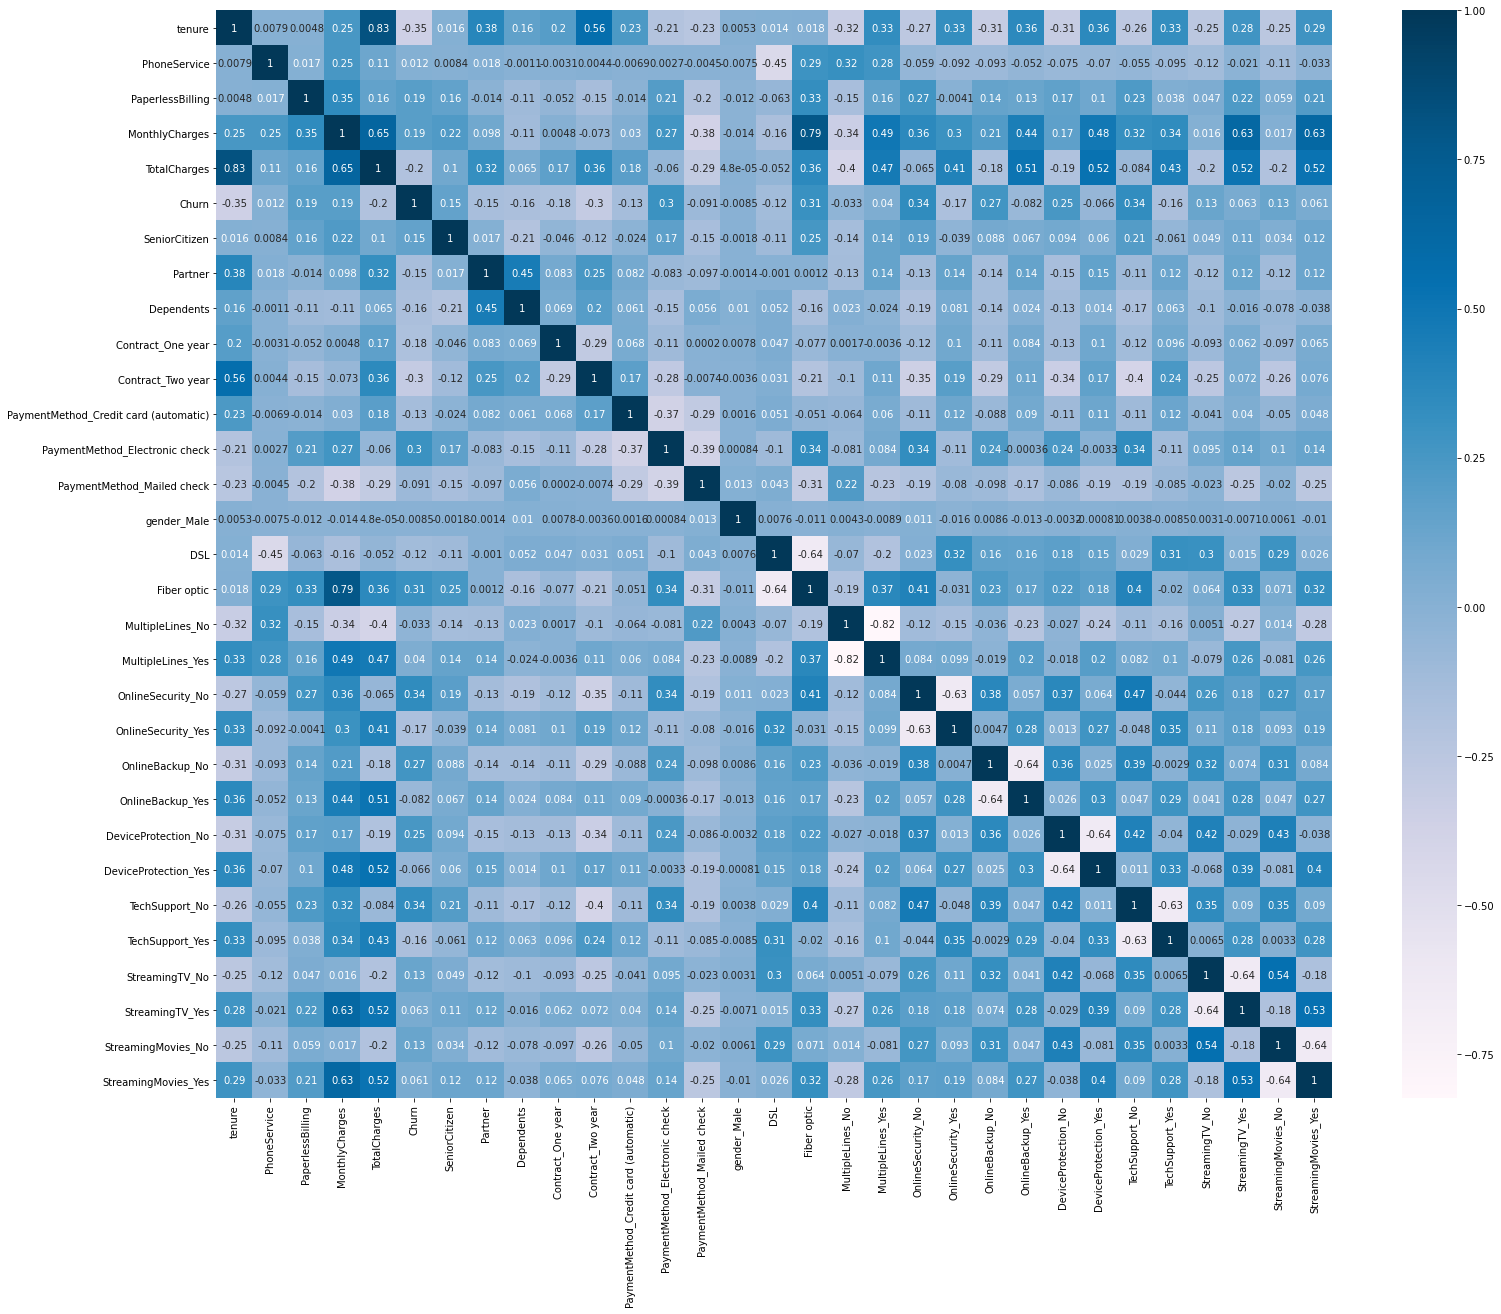

In [21]:
# Checking correlations

plt.figure(figsize = (25,20))
sns.heatmap(df.corr() , cmap = 'PuBu' ,annot= True)

In [22]:
# Dropping highly correlated features
df.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No','StreamingTV_No','StreamingMovies_No'],1 , inplace= True)

<AxesSubplot:>

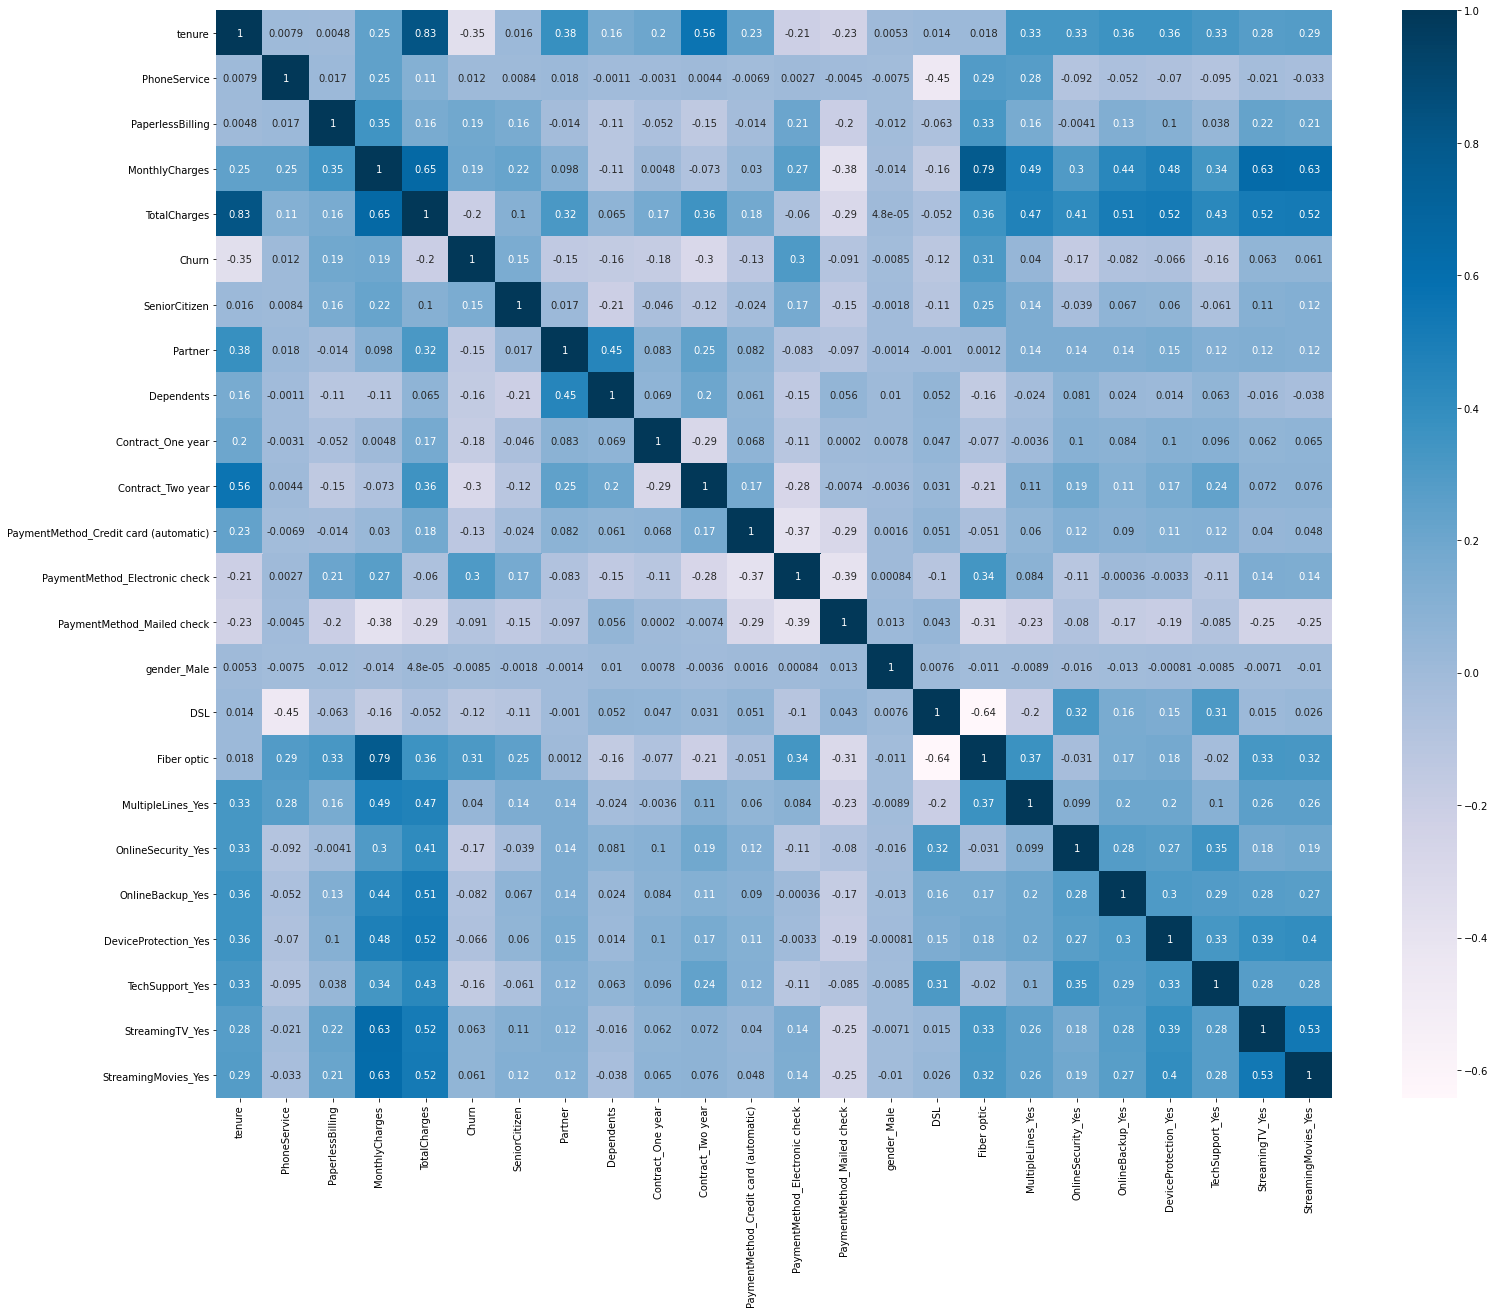

In [23]:
plt.figure(figsize = (25,20))
sns.heatmap(df.corr() , cmap = 'PuBu' ,annot= True)

In [24]:
# Creating X & y

X = df.drop('Churn',1)
y = df['Churn']
X.shape,y.shape

((7032, 23), (7032,))

In [25]:
# Performing train test splits

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X , y, train_size = 0.3 , random_state = 102)

## Model Building 

In [26]:
# performing logistic regression

import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)
lr1 = sm.GLM( y_train ,X_train_sm, family = sm.families.Binomial() )
lr1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 2109
Model:                            GLM   Df Residuals:                     2085
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -849.34
Date:                Mon, 25 Jan 2021   Deviance:                       1698.7
Time:                        22:49:40   Pearson chi2:                 2.02e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -7.3121      3.774     -1.938      0.053     -14.708       0.084
tenure                                   -1.4459      0.288     -5.025      0.000      -2.010      -0.882
PhoneService                              0.9483      1.181      0.803      0.422      -1.367       3.264
PaperlessBilling                          0.2509      0.142      1.771      0.077      -0.027       0.529
MonthlyCharges                           -2.3925      1.741     -1.374      0.169      -5.804       1.019
TotalCharges                              0.7830      0.301      2.598      0.009       0.192       1.374
SeniorCitizen                             0.2363      0.151      1.568      0.117      -0.059       0.532
Partner                                   0.1553      0.146      1.067      0.286      -0.130       0.441
Dependents                               -0.2097      0.168     -1.248      0.212      -0.539       0.120
Contract_One year                        -0.6305      0.202     -3.125      0.002      -1.026      -0.235
Contract_Two year                        -1.3147      0.329     -3.993      0.000      -1.960      -0.669
PaymentMethod_Credit card (automatic)     0.0854      0.212      0.402      0.688      -0.331       0.502
PaymentMethod_Electronic check            0.4291      0.179      2.402      0.016       0.079       0.779
PaymentMethod_Mailed check                0.1099      0.221      0.498      0.619      -0.323       0.543
gender_Male                              -0.2483      0.121     -2.054      0.040      -0.485      -0.011
DSL                                       3.1010      1.473      2.105      0.035       0.214       5.988
Fiber optic                               5.8734      2.908      2.020      0.043       0.174      11.573
MultipleLines_Yes                         0.5362      0.322      1.667      0.096      -0.094       1.167
OnlineSecurity_Yes                       -0.0960      0.327     -0.294      0.769      -0.737       0.545
OnlineBackup_Yes                          0.3071      0.323      0.951      0.342      -0.326       0.940
DeviceProtection_Yes                      0.3327      0.330      1.008      0.314      -0.314       0.980
TechSupport_Yes                          -0.1563      0.337     -0.463      0.643      -0.818       0.505
StreamingTV_Yes                           0.9538      0.595      1.602      0.109      -0.213       2.121
StreamingMovies_Yes                       1.0331      0.599      1.726      0.084      -0.140       2.206
=========================================================================================================
"""

In [27]:
# Using logisticRegression

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train , y_train)

print("Training Accuracy = {}".format(lr.score(X_train,y_train)))

print("Test Accuracy = {} ".format(lr.score(X_test,y_test)))


Training Accuracy = 0.8103366524419156
Test Accuracy = 0.799106236034938 


In [28]:
# USing RecurssiveFeatureElimination to select 15 dominant features

from sklearn.feature_selection import RFE

rfe = RFE(lr,15)
rfe.fit(X_train , y_train)
print(rfe.support_)
print(rfe.ranking_)
list(zip(X_train.columns[rfe.support_],rfe.support_, rfe.ranking_ ))

[ True  True  True  True  True  True False False  True  True False  True
 False  True  True  True False  True  True False  True False False]
[1 1 1 1 1 1 4 3 1 1 8 1 7 1 1 1 6 1 1 2 1 9 5]


[('tenure', True, 1),
 ('PhoneService', True, 1),
 ('PaperlessBilling', True, 1),
 ('MonthlyCharges', True, 1),
 ('TotalCharges', True, 1),
 ('SeniorCitizen', True, 1),
 ('Contract_One year', False, 4),
 ('Contract_Two year', False, 3),
 ('PaymentMethod_Electronic check', True, 1),
 ('gender_Male', True, 1),
 ('DSL', False, 8),
 ('Fiber optic', True, 1),
 ('OnlineSecurity_Yes', False, 7),
 ('OnlineBackup_Yes', True, 1),
 ('TechSupport_Yes', True, 1)]

In [29]:
cols = X_train.columns[rfe.support_]
cols

Index(['tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'SeniorCitizen', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Electronic check', 'gender_Male',
       'DSL', 'Fiber optic', 'OnlineSecurity_Yes', 'OnlineBackup_Yes',
       'TechSupport_Yes'],
      dtype='object')

In [30]:
# so dropping TotalCharges & PhoneService : this step has been done prehand as deleting these features will lead to VIF<5

cols = cols.drop(['TotalCharges','PhoneService','Fiber optic'],1)

In [31]:
# Creating a logistic Regression model with RFE Selected values

lr_rfe = LogisticRegression()
lr_rfe.fit(X_train[cols] , y_train)

LogisticRegression()

In [32]:
# Printing accuracy of the RFE Selecyed train & test sets   

print("Training Accuracy = {}".format(lr.score(X_train,y_train)))
print("Test Accuracy = {} ".format(lr.score(X_test,y_test)))

Training Accuracy = 0.8103366524419156
Test Accuracy = 0.799106236034938 


In [33]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [34]:
vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Contract_Two year,2.44
8,DSL,2.30
1,PaperlessBilling,2.20
11,TechSupport_Yes,2.13
2,MonthlyCharges,2.05
10,OnlineBackup_Yes,2.05
0,tenure,2.03
9,OnlineSecurity_Yes,1.97
7,gender_Male,1.76
6,PaymentMethod_Electronic check,1.73


Finding the cutoff point to predict churn or not

In [35]:
# one way to approach

In [36]:
# Creating a cutoff dataframe  

y_pred = lr_rfe.predict_proba(X_train[cols])[:,1]

cutoff_df = pd.DataFrame(y_pred, columns=['Churn_Prob'])

cutoff_df['Churn'] = y_train.values

cutoff_df['Predicted'] = cutoff_df['Churn_Prob'].map(lambda x:1 if x > 0.5 else 0)

num = [float(x)/10 for x in range(1,10)]

for i in num:
    cutoff_df[i] = cutoff_df['Churn_Prob'].map(lambda x: 1 if x > i else 0)

cutoff_df.head()

,Churn_Prob,Churn,Predicted,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0.044928,0,0,0,0,0,0,0,0,0,0,0
1,0.678673,1,1,1,1,1,1,1,1,0,0,0
2,0.247139,0,0,1,1,0,0,0,0,0,0,0
3,0.006698,0,0,0,0,0,0,0,0,0,0,0
4,0.114078,0,0,1,0,0,0,0,0,0,0,0


In [37]:
# Accuracy of the model

from sklearn.metrics import confusion_matrix ,accuracy_score

print("\n Accuracy = {}".format(accuracy_score(cutoff_df.Churn , cutoff_df.Predicted)))


 Accuracy = 0.802275960170697


In [38]:
# Creating a new optimal_cutoff dataframe to determine the best cutoff value to assigning the churn_prob as 0 or 1

opt_df = pd.DataFrame(columns = ['prob','accuracy','sensitivity','specificity'])

num = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

for i in num:
    
    cm = confusion_matrix(cutoff_df.Churn , cutoff_df[i])
    
    total = sum(sum(cm))
    
    accuracy   = (cm[0,0]+cm[1,1])/total
    
    sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
    
    specificity = cm[1,1]/(cm[1,1]+cm[1,0])
    
    opt_df.loc[i] = [i , accuracy , sensitivity ,specificity]
    
opt_df

,prob,accuracy,sensitivity,specificity
0.1,0.1,0.606923,0.490134,0.947955
0.2,0.2,0.712186,0.667728,0.842007
0.3,0.3,0.769085,0.777849,0.743494
0.4,0.4,0.791370,0.846595,0.630112
0.5,0.5,0.802276,0.902610,0.509294
0.6,0.6,0.795164,0.949714,0.343866
0.7,0.7,0.774301,0.981540,0.169145
0.8,0.8,0.751541,0.998727,0.029740
0.9,0.9,0.744903,1.000000,0.000000


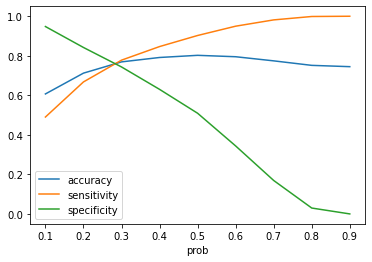

In [39]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
opt_df.plot.line(x='prob', y=['accuracy','sensitivity','specificity'])
plt.show()

So cutoff point comes out to be 0.29

In [40]:
#Another way to approach the cutoff point

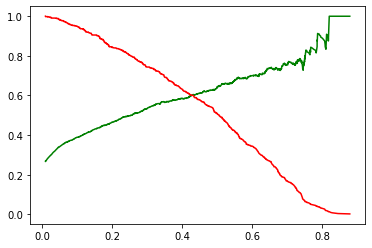

In [41]:
#using precision_recall_curve


optimal = lr_rfe.predict_proba(X_train[cols])[:,1]

optimal = pd.DataFrame(y_pred, columns=['Churn_Prob'])

optimal['Churn'] = y_train.values

optimal['Predicted'] = optimal['Churn_Prob'].map(lambda x:1 if x > 0.5 else 0)


from sklearn.metrics import precision_recall_curve
p, r, thresh = precision_recall_curve(optimal.Churn , optimal.Churn_Prob)

plt.plot(thresh, p[:-1], "g-")
plt.plot(thresh, r[:-1], "r-")
plt.show()

In [42]:
optimal.head()

,Churn_Prob,Churn,Predicted
0,0.044928,0,0
1,0.678673,1,1
2,0.247139,0,0
3,0.006698,0,0
4,0.114078,0,0


In [43]:
optimal['Final_predicted'] = optimal['Churn_Prob'].map(lambda x: 1 if x > 0.4 else 0)
optimal.head()

,Churn_Prob,Churn,Predicted,Final_predicted
0,0.044928,0,0,0
1,0.678673,1,1,1
2,0.247139,0,0,0
3,0.006698,0,0,0
4,0.114078,0,0,0


In [44]:
accuracy_score(optimal.Churn , optimal.Final_predicted)

0.7913703176861071

## Making predictions on the test data 

In [45]:
y_pred_test = lr_rfe.predict_proba(X_test[cols])[:,1]
y_pred_test

array([0.12386763, 0.07146724, 0.3434051 , ..., 0.01114647, 0.1812274 ,
       0.25254796])

In [46]:
# Creating a dataframe

test_df = pd.DataFrame(y_pred_test, columns=['Churn_Prob'])

test_df['Churn'] = y_test.values

test_df['Predicted'] = test_df['Churn'].map(lambda x:1 if x > 0.42 else 0)

test_df.head()

,Churn_Prob,Churn,Predicted
0,0.123868,0,0
1,0.071467,0,0
2,0.343405,1,1
3,0.106346,0,0
4,0.607342,0,0


In [47]:
#accuracy 
accuracy_score(test_df.Churn,test_df.Predicted)

1.0

In [48]:
# Checking Sensitivity & specificity
cm = confusion_matrix(test_df.Churn,test_df.Predicted)

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity = {}'.format(sensitivity))

specificity = cm[1,1]/(cm[1,1]+cm[1,0])
print('Sensitivity = {}'.format(specificity))

Sensitivity = 1.0
Sensitivity = 1.0


So we are getting 100% accuracy on the test data which tells us that our model is performing really well.

Final Conclusions:

1. Company should focus on monthly package charges
2. Males are the major churner
3. Customers paying online bills are major churners
4. Customers opted for tech support 
5. Customers that took online backup
6. Customers that took online security